In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import html
import requests

data=pd.DataFrame()
tarihler= pd.date_range(start="2015-01-01", end="2025-05-21").strftime("%Y-%m-%d").tolist()
url = "https://tarim.ibb.istanbul/inc/halfiyatlari/gunluk_fiyatlar.asp"
for tarih in tarihler:
    print(tarih)
    params = {
        "tarih": tarih,
        "kategori": "6",
        "tUsr": "M3yV353bZe",
        "tPas": "LA74sBcXERpdBaz",
        "tVal": "881f3dc3-7d08-40db-b45a-1275c0245685",
        "HalTurId": "2"
    }

    response = requests.get(url, params=params)


    try:
        # HTML verisini buraya yapıştırabilirsiniz (örnek olarak bir kısmı alındı)
        html_data = response.text

        fixed_html = html_data.encode('latin1').decode('utf-8')

        # BeautifulSoup ile parse et
        soup = BeautifulSoup(fixed_html, "html.parser")

        # Tabloyu bul
        table = soup.find("table", class_="tableClass")

        # Satırları al
        rows = table.find_all("tr")

        # Başlıkları çıkar
        headers = [th.get_text(strip=True) for th in rows[0].find_all("th")]

        # Verileri al
        df = []
        for row in rows[1:]:
            cols = row.find_all("td")
            df.append([col.get_text(strip=True).replace(" TL", "") for col in cols])

        # DataFrame oluştur
        df = pd.DataFrame(df, columns=headers)


    
        df["En Düşük Fiyat"]= df["En Düşük Fiyat"].str.replace(",", ".").str.replace("TL", "").astype(float)
        df["En Yüksek Fiyat"]= df["En Yüksek Fiyat"].str.replace(",", ".").str.replace("TL", "").astype(float)
        df["Ortalama"]=0.5*df["En Düşük Fiyat"]+0.5*df["En Yüksek Fiyat"]
        df=pd.DataFrame(df.groupby("Urun Adı")["Ortalama"].mean())
        data[tarih]=df["Ortalama"]
    except:
        continue



In [252]:
ağırlıklar=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/ağırlıklartüfe.csv",index_col=0)
ürünler=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/harcamaürünleri1.csv",index_col=1)
sebzeler=ağırlıklar.loc[ürünler[ürünler["Grup"]=="Taze sebzeler (patates hariç)"].index]
sebzeler["Ağırlık"] /= sebzeler["Ağırlık"].sum()


In [253]:
data=data.reset_index()


In [254]:
hal=pd.DataFrame()
for sebze in sebzeler.index.values:
    if sebze=="Çarliston Biber":
        sebzem="Çarli"
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)]
    elif sebze=="Dolmalık Biber":
        sebzem="Dolma"
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)]
    elif sebze=="Sivri Biber":
        sebzem="Sivri"  
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)] 
    elif sebze=="Taze Fasulye":
        sebzem="fasülye" 
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)]
    elif sebze=="Kuru Soğan":
        sebzem="Soğan Kuru"
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)]


    elif sebze=="Maydanoz":
        sebzem="maydonoz"
        df=data[data["Urun Adı"].str.contains(sebzem,case=False)]

    

    elif sebze=="Beyaz Lahana":
        df=data[(data["Urun Adı"].str.contains("lahana",case=False)) & (data["Urun Adı"].str.contains("beyaz",case=False))]

    elif sebze=="Kırmızı Lahana":
        df=data[(data["Urun Adı"].str.contains("lahana",case=False)) & (data["Urun Adı"].str.contains("kırmızı",case=False))]

    elif sebze=="Kırmızı Turp":
        df=data[(data["Urun Adı"].str.contains("turp",case=False)) & (data["Urun Adı"].str.contains("kırmızı",case=False))]

    else:
        df=data[data["Urun Adı"].str.contains(sebze,case=False)]


    



    
    df.index=[sebze]*len(df)
    hal=pd.concat([hal,df],axis=0)


    

In [258]:
data=hal.copy().fillna(axis=1,method="ffill")
data.iloc[:,4]=data.iloc[:,5]
data.iloc[:,3]=data.iloc[:,4]
data.iloc[:,2]=data.iloc[:,3]
data.iloc[:,1]=data.iloc[:,2]
data

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\1358886133.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=hal.copy().fillna(axis=1,method="ffill")


,Urun Adı,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,...,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-17,2025-05-18,2025-05-19,2025-05-20,2025-05-21
Beyaz Lahana,Lahana (Beyaz),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,15.0,15.0
Beyaz Lahana,Lahana (Beyaz) Çv,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25,2.25
Dereotu,Dereotu,12.0,12.0,12.0,12.0,12.0,12.0,15.5,16.0,15.0,...,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5
Dereotu,Dereotu II.,8.0,8.0,8.0,8.0,8.0,8.0,9.5,9.5,9.5,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
Dolmalık Biber,Biber (Dolma),1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,1.25,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
Dolmalık Biber,Biber (Dolma) Sera,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Dolmalık Biber,Biber Dolma(Renkli)Sera,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,...,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5
Domates,Domates,1.35,1.35,1.35,1.35,1.35,1.35,1.35,1.35,1.35,...,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5
Domates,Domates ( Beef),2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,...,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5
Domates,Domates (Antalya),3.0,3.0,3.0,3.0,3.0,3.25,3.25,3.25,3.25,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [ ]:
data=data.groupby(level=0).agg({col: 'mean' for col in data.columns if col != 'Urun Adı'}).T
sebze_endeks=(data*sebzeler["Ağırlık"]).sum(axis=1)
sebze_endeks /= sebze_endeks.iloc[0]
sebze_endeks *= 100
sebze_endeks.index = pd.to_datetime(sebze_endeks.index)
sebze_endeks= sebze_endeks.resample("M").mean()

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\2394403447.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sebze_endeks= sebze_endeks.resample("M").mean()


In [310]:
((sebze_endeks.loc["2025-05"].mean()/sebze_endeks.loc["2025-04":"2025-04-21"].mean())-1)*100

-13.667525860762142

In [301]:
tüik=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
col=tüik.iloc[2]
tüik=tüik.iloc[4:]
tüik.columns=col
tüik=tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüik)))
tüik=tüik[["Taze sebzeler (patates hariç)"]].loc["2015-01":]
tüik=tüik.astype(float)
tüik=tüik/tüik.iloc[0]
tüik *= 100
tüik

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\2467728819.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tüik=tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüik)))


2,Taze sebzeler (patates hariç)
2015-01-31,100.000000
2015-02-28,108.694589
2015-03-31,114.108662
2015-04-30,111.825619
2015-05-31,82.233033
...,...
2024-12-31,1535.531215
2025-01-31,1565.077596
2025-02-28,1444.731335
2025-03-31,1732.174598


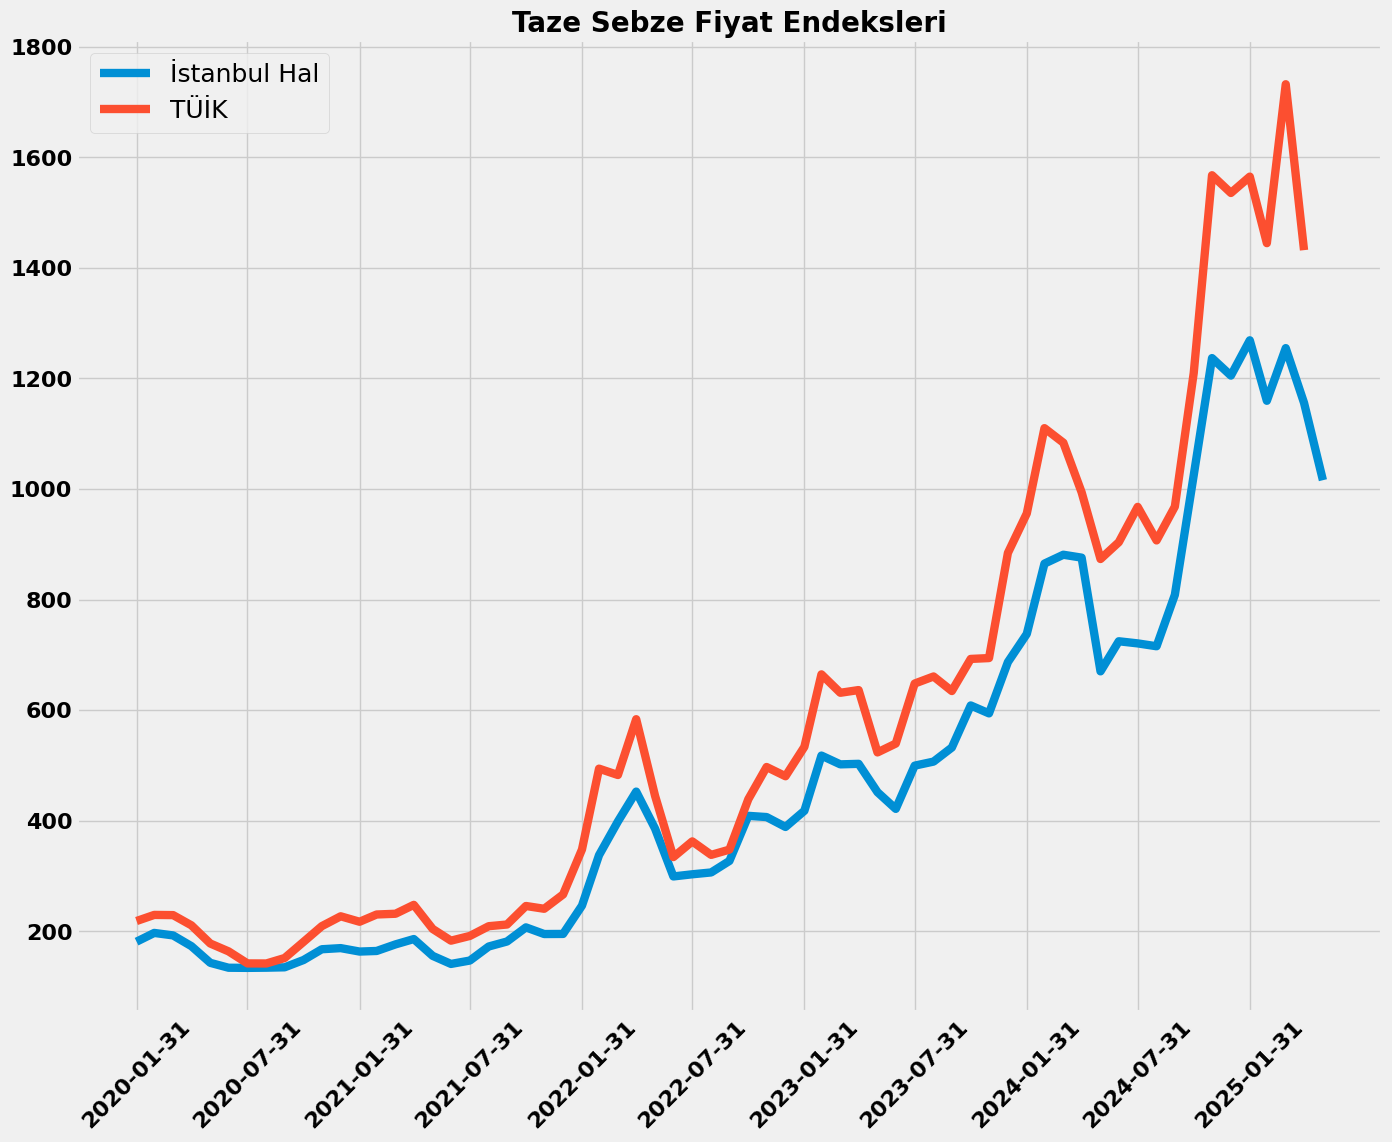

In [326]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 12))
plt.title("Taze Sebze Fiyat Endeksleri",fontsize=20,fontdict={"weight":"bold"})
plt.plot(sebze_endeks.loc["2020":],label="İstanbul Hal",linewidth=6)
plt.plot(tüik["Taze sebzeler (patates hariç)"].loc["2020":],label="TÜİK",linewidth=6)
plt.xticks(sebze_endeks.loc["2020":].index[::6], rotation=45,fontsize=16,fontweight="bold")
plt.yticks(fontsize=16,fontweight="bold")
plt.legend(fontsize=18)

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import html
import requests

data=pd.DataFrame()
tarihler= pd.date_range(start="2020-01-01", end="2025-05-21").strftime("%Y-%m-%d").tolist()
url = "https://tarim.ibb.istanbul/inc/halfiyatlari/gunluk_fiyatlar.asp"
for tarih in tarihler:
    print(tarih)
    params = {
        "tarih": tarih,
        "kategori": "5",
        "tUsr": "M3yV353bZe",
        "tPas": "LA74sBcXERpdBaz",
        "tVal": "881f3dc3-7d08-40db-b45a-1275c0245685",
        "HalTurId": "2"
    }

    response = requests.get(url, params=params)


    try:
        # HTML verisini buraya yapıştırabilirsiniz (örnek olarak bir kısmı alındı)
        html_data = response.text

        fixed_html = html_data.encode('latin1').decode('utf-8')

        # BeautifulSoup ile parse et
        soup = BeautifulSoup(fixed_html, "html.parser")

        # Tabloyu bul
        table = soup.find("table", class_="tableClass")

        # Satırları al
        rows = table.find_all("tr")

        # Başlıkları çıkar
        headers = [th.get_text(strip=True) for th in rows[0].find_all("th")]

        # Verileri al
        df = []
        for row in rows[1:]:
            cols = row.find_all("td")
            df.append([col.get_text(strip=True).replace(" TL", "") for col in cols])

        # DataFrame oluştur
        df = pd.DataFrame(df, columns=headers)


    
        df["En Düşük Fiyat"]= df["En Düşük Fiyat"].str.replace(",", ".").str.replace("TL", "").astype(float)
        df["En Yüksek Fiyat"]= df["En Yüksek Fiyat"].str.replace(",", ".").str.replace("TL", "").astype(float)
        df["Ortalama"]=0.5*df["En Düşük Fiyat"]+0.5*df["En Yüksek Fiyat"]
        df=pd.DataFrame(df.groupby("Urun Adı")["Ortalama"].mean())
        data[tarih]=df["Ortalama"]
    except:
        continue



In [335]:
ağırlıklar=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/ağırlıklartüfe.csv",index_col=0)
ürünler=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/harcamaürünleri1.csv",index_col=1)

sebzeler=ağırlıklar.loc[ürünler[ürünler["Grup"]=="Taze meyveler"].index]
sebzeler=sebzeler.drop("Şeftali",axis=0)
sebzeler["Ağırlık"] /= sebzeler["Ağırlık"].sum()


In [329]:
data=data.reset_index()

In [331]:
hal=pd.DataFrame()
for sebze in sebzeler.index.values:
    

   
    df=data[data["Urun Adı"].str.contains(sebze,case=False)]


    



    
    df.index=[sebze]*len(df)
    hal=pd.concat([hal,df],axis=0)


    

In [345]:
data=hal.copy().fillna(axis=1,method="ffill")

data.iloc[:,1]=data.iloc[:,2]
data=data.groupby(level=0).agg({col: 'mean' for col in data.columns if col != 'Urun Adı'}).T
meyve_endeks=(data*sebzeler["Ağırlık"]).sum(axis=1)
meyve_endeks /= meyve_endeks.iloc[0]
meyve_endeks *= 100
meyve_endeks.index = pd.to_datetime(meyve_endeks.index)
meyve_endeks= meyve_endeks.resample("M").mean()

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\4030441419.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=hal.copy().fillna(axis=1,method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\4030441419.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  meyve_endeks= meyve_endeks.resample("M").mean()


In [349]:
meyve_endeks.pct_change().dropna()*100

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\658817737.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  meyve_endeks.pct_change().dropna()*100


2020-02-29    -1.435063
2020-03-31     4.099228
2020-04-30    -5.622222
2020-05-31     0.223321
2020-06-30    -5.810543
                ...    
2025-01-31    -7.636113
2025-02-28     0.315526
2025-03-31    11.994815
2025-04-30    14.348942
2025-05-31     7.796162
Freq: ME, Length: 64, dtype: float64

In [347]:
tüik=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
col=tüik.iloc[2]
tüik=tüik.iloc[4:]
tüik.columns=col
tüik=tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüik)))
tüik=tüik[["Taze meyveler"]].loc["2020-01":]
tüik=tüik.astype(float)
tüik=tüik/tüik.iloc[0]
tüik *= 100
tüik

C:\Users\Bora\AppData\Local\Temp\ipykernel_34340\67213864.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tüik=tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüik)))


2,Taze meyveler
2020-01-31,100.000000
2020-02-29,109.806691
2020-03-31,115.085406
2020-04-30,131.766460
2020-05-31,147.186691
...,...
2024-12-31,748.219938
2025-01-31,790.706009
2025-02-28,856.138010
2025-03-31,952.083497


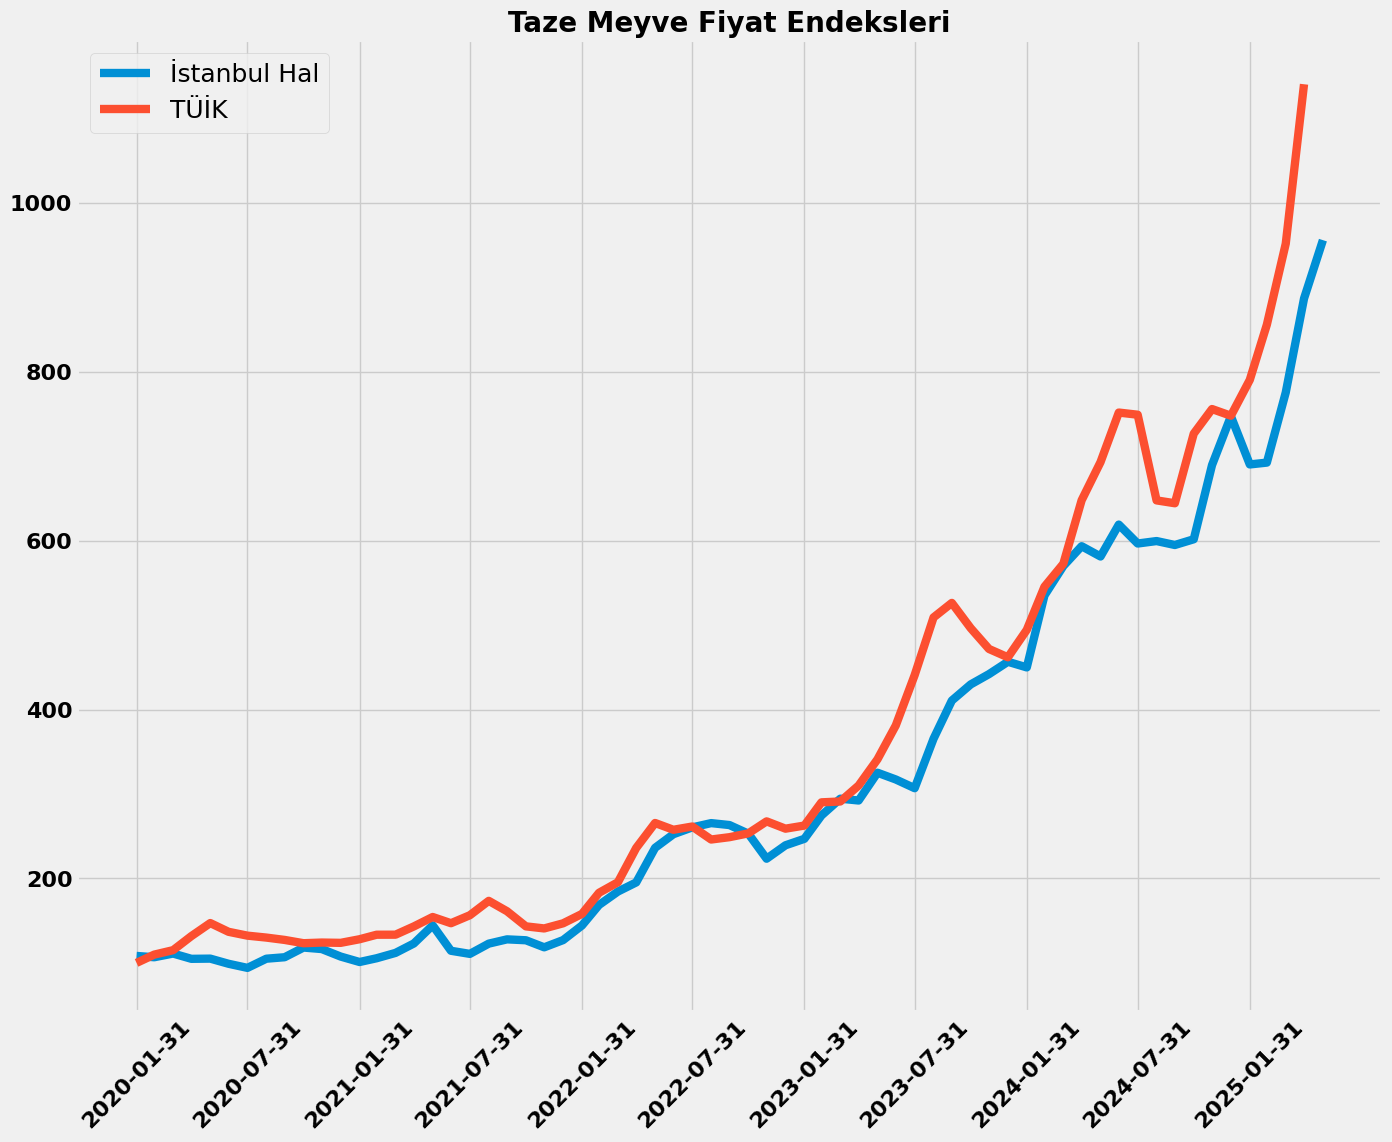

In [348]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 12))
plt.title("Taze Meyve Fiyat Endeksleri",fontsize=20,fontdict={"weight":"bold"})
plt.plot(meyve_endeks.loc["2020":],label="İstanbul Hal",linewidth=6)
plt.plot(tüik["Taze meyveler"].loc["2020":],label="TÜİK",linewidth=6)
plt.xticks(meyve_endeks.loc["2020":].index[::6], rotation=45,fontsize=16,fontweight="bold")
plt.yticks(fontsize=16,fontweight="bold")
plt.legend(fontsize=18)

In [355]:
tüik.pct_change().tail(8)*100

2,Taze meyveler
2024-09-30,-0.522412
2024-10-31,12.794487
2024-11-30,4.009297
2024-12-31,-1.049911
2025-01-31,5.678286
2025-02-28,8.275137
2025-03-31,11.206778
2025-04-30,19.838064


In [356]:
data=pd.DataFrame()
data["Web-TÜFE"]=[7.22,3.5,5.04,7.8,9.19]
data["Hal"]=[8.38,-7.63,0.32,11.99,14.35]
data["TÜİK"]=[-1.05,5.68,8.28,11.21,19.84]
data

,Web-TÜFE,Hal,TÜİK
0,7.22,8.38,-1.05
1,3.50,-7.63,5.68
2,5.04,0.32,8.28
3,7.80,11.99,11.21
4,9.19,14.35,19.84


In [357]:
best_mse = float('inf')
best_weight = None
import numpy as np
weights = np.linspace(0, 1, 1001)  # 0.000, 0.001, ..., 1.000
from sklearn.metrics import mean_squared_error
for w in weights:
    prediction = w * data['Web-TÜFE'] + (1 - w) * data['Hal']
    mse = mean_squared_error(data['TÜİK'], prediction)
    if mse < best_mse:
        print(mse)
        best_mse = mse
        best_weight = w

# Sonuçlar
print(f"En iyi ağırlık (Web-TÜFE): {best_weight:.3f}")
print(f"En iyi ağırlık (Hal): {1 - best_weight:.3f}")
print(f"En düşük MSE: {best_mse:.4f}")

72.03822
71.96962229652
71.90110126608
71.83265690867998
71.76428922432
71.69599821299998
71.62778387472
71.55964620948001
71.49158521728
71.42360089812003
71.35569325200001
71.28786227892002
71.22010797888001
71.15243035187999
71.08482939792
71.017305117
70.94985750912
70.88248657428
70.81519231248001
70.74797472372003
70.680833808
70.61376956531998
70.54678199567999
70.47987109907999
70.41303687552002
70.34627932500001
70.27959844751999
70.21299424308002
70.14646671168
70.08001585332
70.01364166799999
69.94734415572
69.88112331648001
69.81497915027998
69.74891165712
69.68292083700001
69.61700668992
69.55116921587998
69.48540841488
69.41972428692002
69.354116832
69.28858605012
69.22313194128
69.15775450547999
69.09245374272
69.02722965299999
68.96208223632
68.89701149268
68.83201742207999
68.76710002451999
68.70225930000001
68.63749524852
68.57280787008001
68.50819716468
68.44366313232001
68.379205773
68.31482508671999
68.25052107348
68.18629373328
68.12214306612
68.058069072
67.99407

In [456]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.antalya.bel.tr/BilgiEdin/HaldenGunlukFiyat"
tarihler= pd.date_range(start="2025-01-01", end="2025-05-21").strftime("%Y%m%d").tolist()
data=pd.DataFrame(columns=tarihler)
for tarih in tarihler:
    payload = {
        "date": tarih,
        "wholeSaleID": "1"
    }

    headers = {
        "accept": "*/*",
        "accept-encoding": "gzip, deflate, br, zstd",
        "accept-language": "tr-TR,tr;q=0.9,en-US;q=0.8,en;q=0.7",
        "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
        "origin": "https://www.antalya.bel.tr",
        "referer": "https://www.antalya.bel.tr/halden-gunluk-fiyatlar",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/136.0.0.0 Safari/537.36",
        "x-requested-with": "XMLHttpRequest",
        # Gerekiyorsa çerez bilgisi:
        "cookie": "Languages=tr-TR; .AspNetCore.Mvc.CookieTempDataProvider=CfDJ8KaugVNzpf9MpVmPZf9x58LQZA_9cDaP-kHwE6-btYAEva3Nx92ixBwVVHhANcZ_aRoY6WVDndRU2BWSmiNdadmgV8PMwD4ThLQoWhgEf5VnFzwXBomptPG5i-CJdtgSZDBgXELv5dXsEronYKJV7YcJS7tJLscF0aX9fSNg4kuj; _ga_HB8L13KW35=GS2.1.s1747868965$o1$g0$t1747868965$j60$l0$h0$d_Yqh-sAJQNROmi7_SA5T-l1sz9cMak_nQA; _ga=GA1.3.575095463.1747868966; _gid=GA1.3.774389196.1747868966; _gat_gtag_UA_162789198_1=1",
    }

    response = requests.post(url, data=payload, headers=headers)

    if response.status_code == 200:
        df=response.json()
    else:
        print("İstek başarısız oldu. Durum kodu:", response.status_code)

    ürünler = df.get("siraliUrun")

    veri = []

    for ürün in ürünler:
        ad = ürün.get("name")
        fiyat1 = ürün.get("price1")
        fiyat2 = ürün.get("price2")
        veri.append([ad, fiyat1, fiyat2])

    df = pd.DataFrame(veri, columns=["Ürün", "Fiyat (Min)", "Fiyat (Max)"])
    df=df.set_index("Ürün")
    df["Fiyat (Min)"]= df["Fiyat (Min)"].astype(float)
    df["Fiyat (Max)"]= df["Fiyat (Max)"].astype(float)
    df["Ortalama"]=0.5*df["Fiyat (Min)"]+0.5*df["Fiyat (Max)"]
    data=pd.concat([data,(pd.DataFrame(df["Ortalama"]))],axis=1)
   

data

,20250101,20250102,20250103,20250104,20250105,20250106,20250107,20250108,20250109,20250110,...,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama
Zencefil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,155.0,155.0
Sarımsak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,150.0,150.0,105.0,105.0,105.0,105.0,105.0,110.0,110.0
Biber Cin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,40.0,35.0,35.0,35.0,30.0,30.0,30.0,30.0,30.0
Mantar (Taze),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5
Fasulye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,65.0,65.0,65.0,65.0,47.5,47.5,47.5,47.5,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frenk Üzümü,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,225.0,225.0,225.0,225.0,210.0,210.0,210.0,210.0,210.0
Nektarin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,167.5,167.5,132.5,132.5,160.0,160.0,160.0,160.0,160.0
Lime Limon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0
Blue Berry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0


In [458]:
data

,index,20250101,20250102,20250103,20250104,20250105,20250106,20250107,20250108,20250109,...,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama
0,Zencefil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.0,145.0,145.0,145.0,145.0,145.0,145.0,145.0,155.0,155.0
1,Sarımsak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,150.0,150.0,105.0,105.0,105.0,105.0,105.0,110.0,110.0
2,Biber Cin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,40.0,35.0,35.0,35.0,30.0,30.0,30.0,30.0,30.0
3,Mantar (Taze),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5,82.5
4,Fasulye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,65.0,65.0,65.0,65.0,47.5,47.5,47.5,47.5,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Frenk Üzümü,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,225.0,225.0,225.0,225.0,210.0,210.0,210.0,210.0,210.0
83,Nektarin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,167.5,167.5,132.5,132.5,160.0,160.0,160.0,160.0,160.0
84,Lime Limon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0,164.0
85,Blue Berry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0


In [ ]:
data=data.reset_index(drop=False)
data=data.rename(columns={"index":"Ürün"})
hal=pd.DataFrame()
for sebze in sebzeler.index.values:
    

   
    df=data[data["Ürün"].str.contains(sebze,case=False)]


    



    
    df.index=[sebze]*len(df)
    hal=pd.concat([hal,df],axis=0)

In [460]:
hal

,Ürün,20250101,20250102,20250103,20250104,20250105,20250106,20250107,20250108,20250109,...,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama,Ortalama
Armut,Armut (Santamariya),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.000,50.000,50.000,57.500,57.500,57.500,57.500,57.500,57.500,57.500
Ayva,Ayva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.000,40.000,40.000,40.000,40.000,40.000,40.000,40.000,40.000,40.000
Elma,Elma (Grann Smith),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000,70.000
Elma,Elma (Starking),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
Elma,Elma (Golden),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
Karpuz,Karpuz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.500,22.500,22.500,24.000,24.000,25.000,25.000,25.000,25.000,25.000
Kavun,Kavun(Kırkağaç),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000,40.000,40.000
Kivi,Kivi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.500,102.500,102.500,102.500,102.500,102.500,102.500,102.500,102.500,102.500
Kivi,Marul (Kıvırcık),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.500,12.500,12.500,12.500,12.500,12.000,12.000,12.000,12.000,12.000
Limon,Limon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.000,40.000,40.000,41.000,41.000,45.000,45.000,50.000,55.000,55.000


In [433]:
hal=hal.groupby(level=0).agg({col: 'mean' for col in hal.columns if col != 'Ürün'}).T
hal=hal.set_index(pd.date_range(start="2025-01-01",freq="D",periods=len(hal)))
hal

,Armut,Ayva,Elma,Kivi,Limon,Muz,Nar,Portakal,Çilek,Üzüm
2025-01-01,40.0,32.5,35.000000,54.00,16.0,55.7500,36.0,22.25,65.0,72.5
2025-01-02,40.0,32.5,35.000000,54.00,16.0,55.7500,36.0,22.25,65.0,72.5
2025-01-03,40.0,32.5,35.000000,54.00,16.0,55.7500,36.0,22.25,65.0,72.5
2025-01-04,40.0,32.5,35.000000,54.00,16.0,55.7500,36.0,22.25,65.0,72.5
2025-01-05,40.0,32.5,35.000000,54.00,16.0,55.7500,36.0,22.25,65.0,72.5
...,...,...,...,...,...,...,...,...,...,...
2025-05-17,57.5,40.0,56.666667,57.25,45.0,90.2625,NaN,37.00,42.5,NaN
2025-05-18,57.5,40.0,56.666667,57.25,45.0,90.2625,NaN,37.00,42.5,NaN
2025-05-19,57.5,40.0,56.666667,57.25,50.0,90.2625,NaN,37.00,42.5,NaN
2025-05-20,57.5,40.0,56.666667,57.25,55.0,90.2625,NaN,37.00,42.5,NaN


In [413]:
hal*sebzeler["Ağırlık"]

,Armut,Ayva,Elma,Karpuz,Kavun,Kivi,Limon,Mandalina,Muz,Nar,Portakal,Çilek,Üzüm
2025-01-01,1.315725,0.396611,4.813555,NaN,NaN,0.526990,1.103404,NaN,10.513868,0.605501,2.238850,2.959783,6.201816
2025-01-02,1.315725,0.396611,4.813555,NaN,NaN,0.526990,1.103404,NaN,10.513868,0.605501,2.238850,2.959783,6.201816
2025-01-03,1.315725,0.396611,4.813555,NaN,NaN,0.526990,1.103404,NaN,10.513868,0.605501,2.238850,2.959783,6.201816
2025-01-04,1.315725,0.396611,4.813555,NaN,NaN,0.526990,1.103404,NaN,10.513868,0.605501,2.238850,2.959783,6.201816
2025-01-05,1.315725,0.396611,4.813555,NaN,NaN,0.526990,1.103404,NaN,10.513868,0.605501,2.238850,2.959783,6.201816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-17,1.891355,0.488136,7.793375,NaN,NaN,0.558706,3.103324,NaN,17.022565,NaN,3.723032,1.935243,NaN
2025-05-18,1.891355,0.488136,7.793375,NaN,NaN,0.558706,3.103324,NaN,17.022565,NaN,3.723032,1.935243,NaN
2025-05-19,1.891355,0.488136,7.793375,NaN,NaN,0.558706,3.448138,NaN,17.022565,NaN,3.723032,1.935243,NaN
2025-05-20,1.891355,0.488136,7.793375,NaN,NaN,0.558706,3.792951,NaN,17.022565,NaN,3.723032,1.935243,NaN
